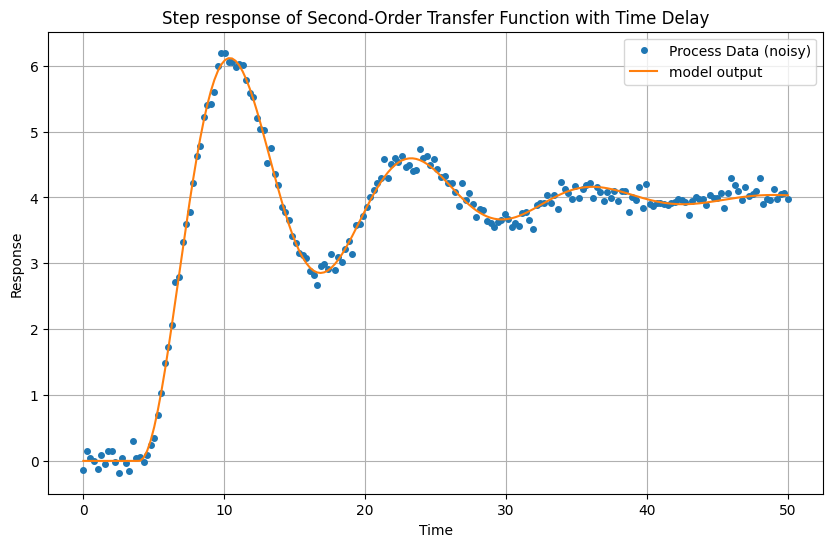

Fitted Parameters:
  Kp (Gain): 3.9881
  τ (Time Constant): 2.0077
  ζ (Damping Ratio): 0.1961
  Θ (Time Delay): 3.9598


In [10]:
# Identification of second order transfer function model with time delay from process data
# Seshu Damarla, 28 Nov. 2024
# Reference: Process Control: Modelling, Simulation and Control by B. W. Bequette
# Chemical Process Control An Introduction to Theory and Practice - George Stephanopoulos
"""
Second-order transfer function with time delay:
    G(s) = Kp / (tau^2 * s^2 + 2*zeta*tau*s + 1) * e^(-s*Θ)
    t: time
    Kp: system gain
    tau: time constant
    zeta: damping ratio
    Θ: time delay     """

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

# response of the model to step change of magnitude A in input
def second_order_model_with_delay(t, Kp, tau, zeta, Θ):
    A = 1
    response = np.zeros_like(t)
    for i, time in enumerate(t):
        if time >= Θ:
            timeshift = time - Θ
            if zeta>1:   # overdamped process
               AA1 = math.cosh(np.sqrt(zeta**2-1)*(timeshift/tau))
               AA0 = zeta/np.sqrt(zeta**2-1)
               AA2 = math.sinh(np.sqrt(zeta**2-1)*(timeshift/tau))
               response[i] = A*Kp * (1-np.exp(-(timeshift*zeta) / tau) *(AA1 + AA0*AA2))
            elif zeta == 1:   # critically damped process
                 response[i] = A*Kp * (1 - (1+(timeshift/tau)) * np.exp(-timeshift/tau))
            else:  # underdamped process
                BB0 = 1/np.sqrt(1-zeta**2)
                omega = np.sqrt(1-zeta**2)/tau
                phi = math.atan(np.sqrt(1-zeta**2)/zeta)
                response[i] = A*Kp*(1 - BB0 * np.exp(-(timeshift*zeta) / tau) *math.sin(omega*timeshift + phi))
    return response

# generate process data
time = np.linspace(0, 50, 200)  # Time vector
Kp_true, tau_true, zeta_true, Θ_true = 4, 2, 0.2, 4  # True parameters
process_data = second_order_model_with_delay(time, Kp_true, tau_true, zeta_true, Θ_true)
process_data += 0.1 * np.random.normal(size=len(time))  # Add noise to simulate real data

# Fit the model to the process data
initial_guess = [1.0, 1.0, 0.5, 1.0]  # Initial guesses for K, tau, zeta, T_d
params, covariance = curve_fit(second_order_model_with_delay, time, process_data, p0=initial_guess)

# Extract fitted parameters
Kp_est, tau_est, zeta_est, Θ_est = params

# Generate the fitted response
ymodel = second_order_model_with_delay(time, Kp_est, tau_est, zeta_est, Θ_est)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(time, process_data, 'o', label='Process Data (noisy)', markersize=4)
plt.plot(time, ymodel, '-', label='model output')
plt.title('Step response of Second-Order Transfer Function with Time Delay')
plt.xlabel('Time')
plt.ylabel('Response')
plt.legend()
plt.grid()
plt.show()

# Print fitted parameters
print(f"Fitted Parameters:")
print(f"  Kp (Gain): {Kp_est:.4f}")
print(f"  τ (Time Constant): {tau_est:.4f}")
print(f"  ζ (Damping Ratio): {zeta_est:.4f}")
print(f"  Θ (Time Delay): {Θ_est:.4f}")
